In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(torch.__version__)

2.6.0+cpu


In [4]:
train_dt = datasets.MNIST(root='./data', train=True, transform=ToTensor(), download=True)

In [5]:
test_dt = datasets.MNIST(root='./data', train=False, transform=ToTensor(), download=True)

In [6]:
train_dt

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_dt

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
train_dt.data.shape

torch.Size([60000, 28, 28])

In [9]:
train_dt.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [10]:
loader = {
    'train': DataLoader(train_dt,
                        batch_size=10,
                        shuffle=True,
                        num_workers=1),
    'test': DataLoader(test_dt,
                       batch_size=10,
                       shuffle=True,
                       num_workers=1),
}

In [11]:
loader

{'train': <torch.utils.data.dataloader.DataLoader at 0x2284d967950>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x2284dac0cb0>}

In [12]:
class NET(nn.Module):
    def __init__(self):
        super(NET, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 10, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(250, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.elu(F.max_pool2d(self.conv1(x), 2))
        x = F.elu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 250)
        x = F.elu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)

In [13]:
device = torch.device('cpu')

In [14]:
model = NET().to(device)
opt = optim.Adam(model.parameters(), lr=0.001)
loss = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loader['train']):
        data, target = data.to(device), target.to(device)
        opt.zero_grad()
        output = model(data)
        l = loss(output, target)
        l.backward()
        opt.step()

        if batch_idx%60000 == 0:
            print('Pass ✅')

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loader['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(loader['test'].dataset)

In [15]:
time_init = time.time()

In [16]:
for epoch in range(1, 11):
    train(epoch)
    test()

Pass ✅
Pass ✅
Pass ✅
Pass ✅
Pass ✅
Pass ✅
Pass ✅
Pass ✅
Pass ✅
Pass ✅


In [17]:
time_f = time.time()

In [18]:
tu = time_f - time_init
print(f'CPU Time: {tu/60} mins')

CPU Time: 5.138761508464813 mins


Prediction: 9


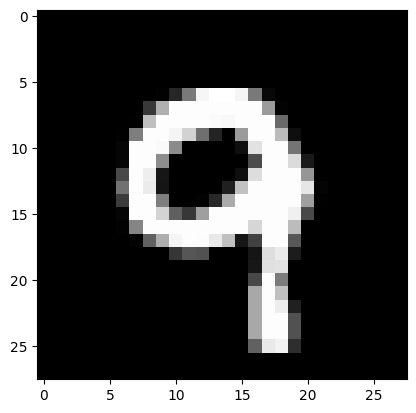

In [19]:
model.eval()

data, target = test_dt[99]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'Prediction: {prediction}')

img = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(img, cmap='gray')
plt.show()

In [20]:
model.eval()

NET(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=250, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [21]:
score = 0
num = len(loader['test'])
for i in range(num):
    data, target = test_dt[i]
    data = data.unsqueeze(0).to(device)
    output = model(data)
    prediction = output.argmax(dim=1, keepdim=True).item()

    if prediction == target:
        print(f'Target: {target} | Prediction: {prediction} ✅')
        score+=1
    else:
        print(f'Target: {target} | Prediction: {prediction} ❌')

Target: 7 | Prediction: 7 ✅
Target: 2 | Prediction: 2 ✅
Target: 1 | Prediction: 1 ✅
Target: 0 | Prediction: 0 ✅
Target: 4 | Prediction: 4 ✅
Target: 1 | Prediction: 1 ✅
Target: 4 | Prediction: 4 ✅
Target: 9 | Prediction: 9 ✅
Target: 5 | Prediction: 5 ✅
Target: 9 | Prediction: 9 ✅
Target: 0 | Prediction: 0 ✅
Target: 6 | Prediction: 6 ✅
Target: 9 | Prediction: 9 ✅
Target: 0 | Prediction: 0 ✅
Target: 1 | Prediction: 1 ✅
Target: 5 | Prediction: 5 ✅
Target: 9 | Prediction: 9 ✅
Target: 7 | Prediction: 7 ✅
Target: 3 | Prediction: 3 ✅
Target: 4 | Prediction: 4 ✅
Target: 9 | Prediction: 9 ✅
Target: 6 | Prediction: 6 ✅
Target: 6 | Prediction: 6 ✅
Target: 5 | Prediction: 5 ✅
Target: 4 | Prediction: 4 ✅
Target: 0 | Prediction: 0 ✅
Target: 7 | Prediction: 7 ✅
Target: 4 | Prediction: 4 ✅
Target: 0 | Prediction: 0 ✅
Target: 1 | Prediction: 1 ✅
Target: 3 | Prediction: 3 ✅
Target: 1 | Prediction: 1 ✅
Target: 3 | Prediction: 3 ✅
Target: 4 | Prediction: 4 ✅
Target: 7 | Prediction: 7 ✅
Target: 2 | Predicti

In [22]:
print(f'Score: {score}/{num}')
print(f'Acc: {(score/num)*100}%')

Score: 976/1000
Acc: 97.6%
